In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
titanic_df = pd.read_csv('/Users/nihararvindbhagat/Desktop/all-2/train.csv')  #import data

In [5]:
titanic_df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()   #info of the dataset (entries, columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


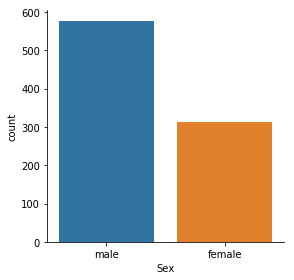

In [16]:
sns.factorplot('Sex', data = titanic_df, kind = 'count')  #count the no. of males and females

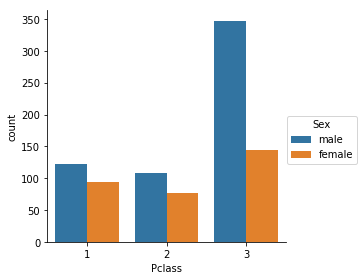

In [17]:
sns.factorplot('Pclass', data= titanic_df, kind='count', hue='Sex')  #we can see that males in every class is greater than females

In [18]:
def male_female_child(passenger):   #defining a function
    age,sex = passenger
    
    if age<16:
        return 'child'
    else:
        return sex
    #to identify the type of person on the ship

In [20]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child,axis=1)   #applying the function (new column)

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


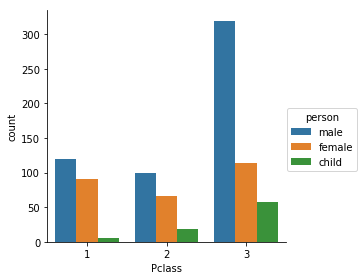

In [27]:
sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'person')  #look for male, female and child in every class

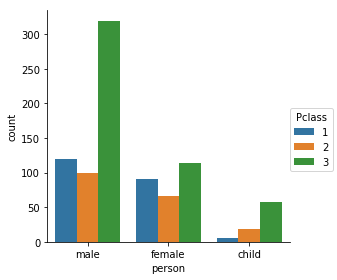

In [28]:
sns.factorplot('person', data = titanic_df, kind= 'count', hue = 'Pclass')

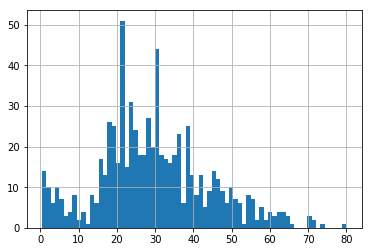

In [32]:
titanic_df['Age'].hist(bins=70)

In [33]:
titanic_df['Age'].mean()

29.69911764705882

In [34]:
titanic_df['person'].value_counts()  #know the number of type of person on the ship

male      537
female    271
child      83
Name: person, dtype: int64

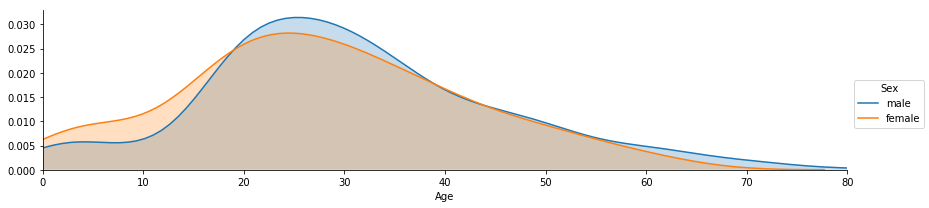

In [36]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)   #create object 'fig'
fig.map(sns.kdeplot,'Age', shade=True)                     #map according to 'Age'

oldest = titanic_df['Age'].max()    #create the 'oldest' object to get the oldest age of the person 

fig.set(xlim=(0,oldest))    #set limit of the age

fig.add_legend()

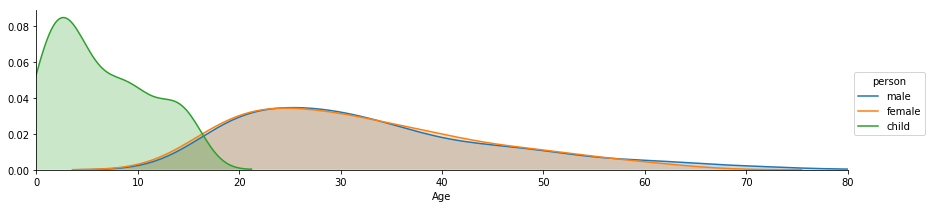

In [37]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)   #create object 'fig'
fig.map(sns.kdeplot,'Age', shade=True)                     #map according to 'Age'

oldest = titanic_df['Age'].max()    #create the 'oldest' object to get the oldest age of the person 

fig.set(xlim=(0,oldest))    #set limit of the age

fig.add_legend()

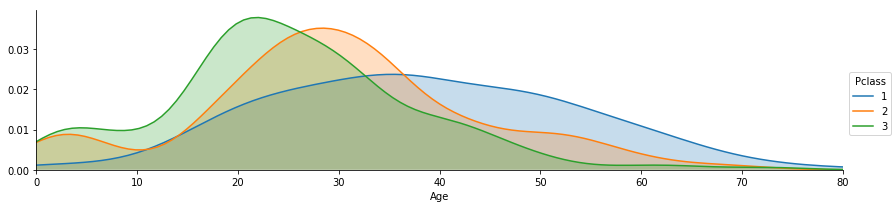

In [38]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)   #create object 'fig'
fig.map(sns.kdeplot,'Age', shade=True)                     #map according to 'Age'

oldest = titanic_df['Age'].max()    #create the 'oldest' object to get the oldest age of the person 

fig.set(xlim=(0,oldest))    #set limit of the age

fig.add_legend()

In [39]:
deck = titanic_df['Cabin'].dropna()

In [40]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [45]:
import sys

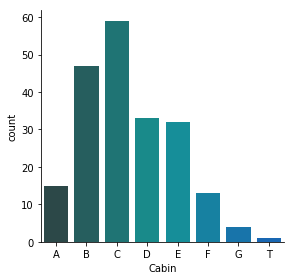

In [78]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, kind = 'count', palette = 'winter_d', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

In [115]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [117]:
titanic_df['Deck'] = cabin_df['Cabin']

In [118]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


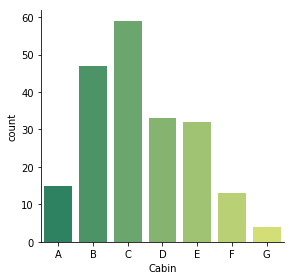

In [77]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin', data = cabin_df, kind = 'count', palette = 'summer', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [56]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


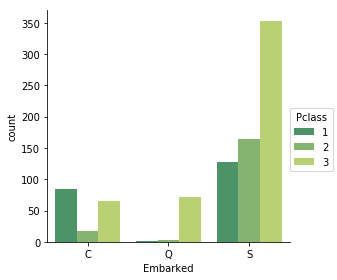

In [76]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count',hue = 'Pclass', palette = 'summer', order = ['C', 'Q', 'S'])

In [79]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [81]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [85]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'



/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [86]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


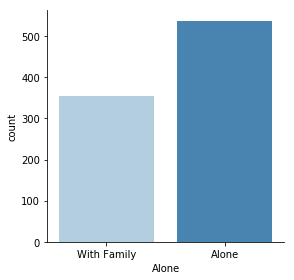

In [90]:
sns.factorplot('Alone', data = titanic_df, kind = 'count' , palette = 'Blues')

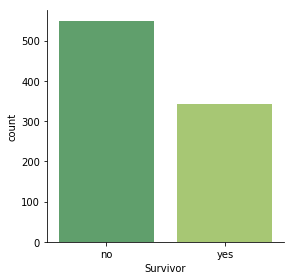

In [93]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

sns.factorplot('Survivor', data = titanic_df, kind = 'count', palette = 'summer')

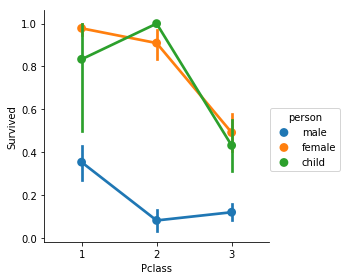

In [98]:
sns.factorplot('Pclass', 'Survived', data = titanic_df, hue = 'person')

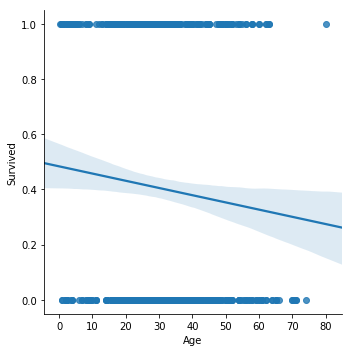

In [100]:
sns.lmplot('Age', 'Survived', data = titanic_df)

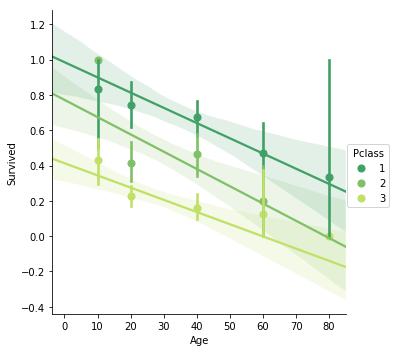

In [104]:
Generation = [10,20,40,60,80]

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'summer', x_bins = Generation)

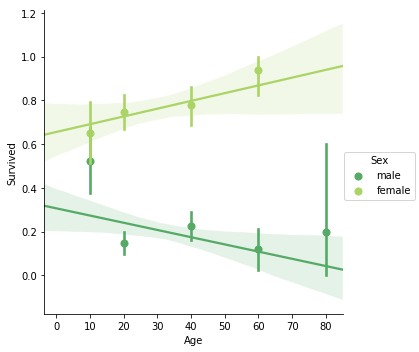

In [108]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'summer', x_bins = Generation)

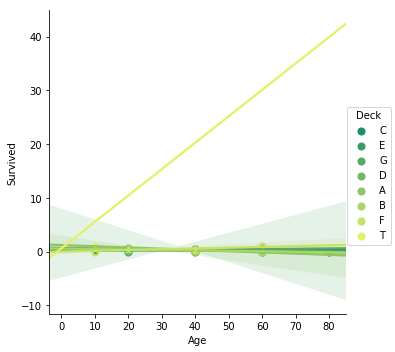

In [125]:
sns.lmplot('Age', 'Survived', hue = 'Deck', data = titanic_df, palette = 'summer', x_bins = Generation)

In [126]:
titanic_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,D
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,A
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no,C
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes,B
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes,D
